In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
from os.path import dirname,join
import sys
import csv
import __main__
import json

sys.path.append('/home/mht/PythonProjects/dbo')
from src.benchmark_functions_2D import *
from matplotlib import cm

import pandas as pd
import seaborn as sns
import itertools

# colors = ['navy','darkblue','mediumblue','blue']
colors = ['m','g','b','c']

# result_to_dump = 'ackley/query_dist_3'

result_to_dump = 'rosenbrock/query_dist'
function_dict = {'bird':Bird(), 'disk':Disk(), 'ackley': Ackley(), 'rosenbrock': Rosenbrock(),
                 'eggholder': Eggholder()}
obj = function_dict.get(result_to_dump.split('/')[0])
objective = lambda x: - obj.function(x)
SLIDES = True
# sns.set(style="darkgrid")
grid_elemets = []
for [i,j] in obj.domain:
    grid_elemets.append(np.linspace(i, j, 100))
_grid = np.array(list(itertools.product(*grid_elemets)))
root_dir = '/home/mht/PythonProjects/dbo'
results_dir = join(join(root_dir, 'result'), result_to_dump)

def load_data():
    dirs = [dir for dir in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, dir))]
    i = 2
    dfs = []
    for result_dir in sorted(dirs):
        file_dir = join(join(join(root_dir, 'result'), result_to_dump), result_dir)
        dfs.append(pd.read_csv(os.path.join(file_dir, 'data/data.csv')))

    return dfs

dfs = load_data()
df = pd.concat(dfs, ignore_index=True)


In [2]:
results_dir

'/home/mht/PythonProjects/dbo/result/rosenbrock/query_dist_2'

In [3]:
result_to_dump_10 = 'rosenbrock/query_dist_2'
# sns.set(style="darkgrid")
grid_elemets = []
for [i,j] in obj.domain:
    grid_elemets.append(np.linspace(i, j, 100))
_grid = np.array(list(itertools.product(*grid_elemets)))
root_dir = '/home/mht/PythonProjects/dbo'
results_dir = join(join(root_dir, 'result'), result_to_dump_10)

def load_data():
    dirs = [dir for dir in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, dir))]
    i = 2
    dfs = []
    for result_dir in sorted(dirs):
        file_dir = join(join(join(root_dir, 'result'), result_to_dump_10), result_dir)
        dfs.append(pd.read_csv(os.path.join(file_dir, 'data/data.csv')))

    return dfs

df10s = load_data()
df10 = pd.concat(df10s, ignore_index=True)

In [17]:
df10

,Unnamed: 0,iteration,runs,alg,regret,distance_traveled,argmax_mean_x1,argmax_mean_x2,agent1_obs,agent2_obs,...,agent6_x1,agent6_x2,agent7_x1,agent7_x2,agent8_x1,agent8_x2,agent9_x1,agent9_x2,agent10_x1,agent10_x2
0,0,1,0,BUCB,3.505409,20.604317,0.218483,-0.853381,-3.505409,-3.505409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,0,BUCB,3.505409,21.464651,1.027634,0.448832,-4.166946,-4.166946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,0,BUCB,3.136546,23.580452,-0.008182,-0.521524,-3.136546,-3.136546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,4,0,BUCB,3.037801,24.884185,0.231653,-0.339845,-3.774796,-3.774796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,0,BUCB,2.846109,26.537793,0.231653,-0.339845,-2.846109,-3.270132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,146,0,UCBPE,0.016074,3428.406038,0.002010,-0.005020,-0.579179,-7.385927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,0,147,0,UCBPE,0.016074,3452.950413,0.002010,-0.005020,-1.145685,-10.338508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,0,148,0,UCBPE,0.016074,3474.996244,0.002010,-0.005020,-1.015670,-10.841536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,0,149,0,UCBPE,0.016074,3492.883610,0.002010,-0.005020,-2.870597,-9.993042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def get_queries(alg, start_iter, to_iter, df):
    df_alg = df[df['alg']==alg]
    a1x1 = df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent1_x1'].values
    a1x2 = df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent1_x2'].values
    aox1 = np.concatenate([df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent{}_x1'.format(i+2)].values for i in range(4)])
    aox2 = np.concatenate([df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent{}_x2'.format(i+2)].values for i in range(4)])
    # y = np.concatenate([df[df['iteration']<=to_iter]['agent{}_obs'.format(i+1)].values for i in range(5)])
    return a1x1, a1x2, aox1, aox2

def get_argmax_mean(alg, iter, df):
    df_alg = df[df['alg']==alg]
    x1 = df_alg[df_alg['iteration'] == iter]['argmax_mean_x1'].values
    x2 = df_alg[df_alg['iteration'] == iter]['argmax_mean_x2'].values
    # aox1 = np.concatenate([df_alg[df_alg['iteration'] == iter]['agent{}_x1'.format(i+2)].values for i in range(4)])
    # aox2 = np.concatenate([df_alg[df_alg['iteration'] == iter]['agent{}_x2'.format(i+2)].values for i in range(4)])
    # y = np.concatenate([df[df['iteration']<=to_iter]['agent{}_obs'.format(i+1)].values for i in range(5)])
    return x1, x2

<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_5849/764776748.py:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if alg is not 'ES':
/tmp/ipykernel_5849/764776748.py:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if alg is not 'ES':
/tmp/ipykernel_5849/764776748.py:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if alg is not 'ES':


KeyError: 'argmax_mean_x1'

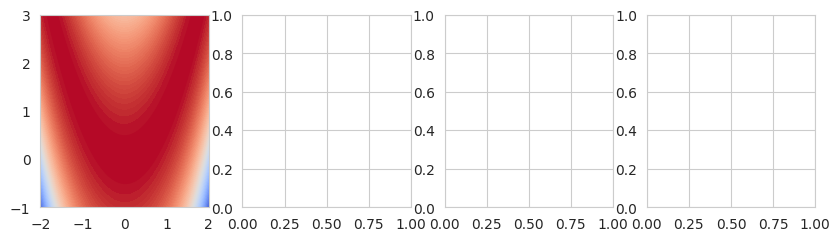

In [21]:
iters_to_show = [1, 50, 100, 150]

def _plot_2d(alg, regret):

    cmap = cm.get_cmap('jet')
    rgba = [cmap(i) for i in np.linspace(0, 1, 5)]

    class ScalarFormatterForceFormat(ticker.ScalarFormatter):
        def _set_format(self):
            self.format = "%1.2f"
    fmt = ScalarFormatterForceFormat()
    fmt.set_powerlimits((0,0))
    fmt.useMathText = True


    first_param_grid = np.linspace(obj.domain[0,0], obj.domain[0,1], 100)
    second_param_grid = np.linspace(obj.domain[1,0], obj.domain[1,1], 100)
    X, Y = np.meshgrid(first_param_grid, second_param_grid, indexing='ij')



    N = 100
    Y_obj = [objective(i) for i in _grid]
    clev1 = np.linspace(min(Y_obj), max(Y_obj),N)

    fig, ax = plt.subplots(1, 4, figsize=(10, 2.5))
    for i in range(len(iters_to_show)): # , sharex=True
        cp1 = ax[i].contourf(X, Y, np.array(Y_obj).reshape(X.shape), clev1,  cmap = cm.coolwarm)
        for c in cp1.collections:
            c.set_edgecolor("face")
        # cbar1 = plt.colorbar(cp1, ax=ax[i], shrink = 0.9, format=fmt, pad = 0.05, location='right')
        # cbar1.ax.tick_params(labelsize=10)
        # cbar1.ax.locator_params(nbins=5)
        ax[i].autoscale(False)
        # for j in range(i + 1):
        #     if j == 0:
        #         a1x1, a1x2, aox1, aox2 = get_queries(alg, 0, iters_to_show[j], df)
        #     else:
        #         a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[j-1], iters_to_show[j], df)
        #     ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'c', s = 6, label='Agent 1')
        #     ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'g', s = 6, label='Other agents')
        if i < 3:
            if alg is not 'ES':
                a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[i]-1 ,iters_to_show[i]+1 , df)
            else:
                a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[i]-1 ,iters_to_show[i]+1, df)
        else:
            a1x1, a1x2, aox1, aox2 = get_queries(alg, 0 ,150, df)
        if alg == 'BUCB':
            print(aox1, aox2)
            print(a1x1,a1x2)
        x1, x2 = get_argmax_mean(alg, iters_to_show[i], df)

        ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'grey', s = 10)
        ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'grey', s = 10, label='queries')
        # ax[i].scatter(x1, x2, zorder=10 - j + 2, color = 'y', s = 20, label='max mean value')
        ax[i].scatter(obj.arg_min[0][0], obj.arg_min[0][1], color = 'black', zorder=10 - j + 3, marker='*',s=40, label='true maximum')
        if i == 0:
            leg1 = ax[i].legend(loc='upper right', fancybox=True, framealpha = 0.2)
            ax[i].add_artist(leg1)
        ax[i].set_xlim([first_param_grid[0], first_param_grid[-1]])
        ax[i].set_ylim([second_param_grid[0], second_param_grid[-1]])
        # ax[i].set_xticks(np.linspace(first_param_grid[0],first_param_grid[-1], 5))
        # ax[i].set_yticks(np.linspace(second_param_grid[0],second_param_grid[-1], 5))
        plt.setp(ax[i].get_yticklabels()[0], visible=False)
        ax[i].tick_params(axis='both', which='both', labelsize=10)

        ax[i].tick_params(axis='both', which='major', labelsize=10)
        ax[i].tick_params(axis='both', which='minor', labelsize=10)
        # fig.subplots_adjust(wspace=0, hspace=0)
        ax[i].yaxis.offsetText.set_fontsize(10)
        if i < 3:
            ax[i].set_xlabel('queries at {} step'.format(iters_to_show[i]))
        else:
            ax[i].set_xlabel('all queries {} step'.format(iters_to_show[i]))
        fig.suptitle(alg + ' instant regret:' + str(regret) + r'$\times10^{-2}$')
        fig_name = 'query_dist_' + alg + '.pdf'
        plt.savefig(os.path.join(results_dir, fig_name))


_plot_2d('UCBPE', 1.762)
_plot_2d('BUCB', 1.607)
_plot_2d('ES', 1.349)

# rosenbrock
# _plot_2d('UCBPE', 1.945)
# _plot_2d('BUCB', 7.945)
# _plot_2d('ES', 1.343)

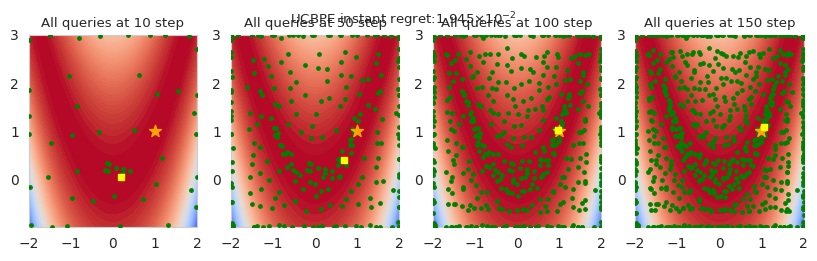

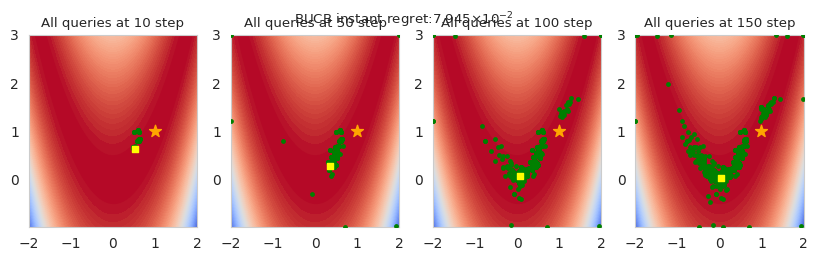

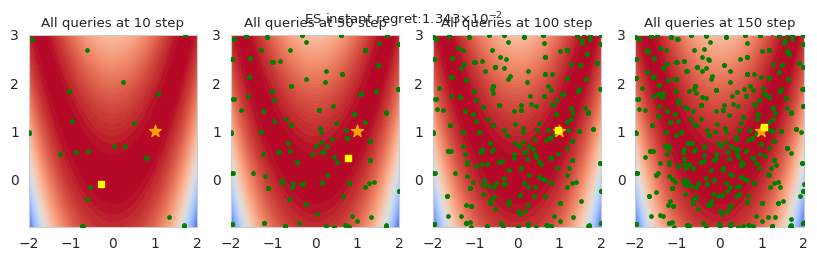

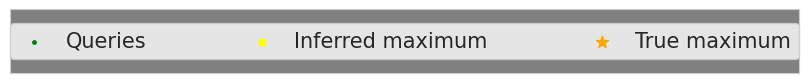

In [19]:
iters_to_show = [10, 50, 100, 150]
plt.rcParams.update({'font.size': 8})

def _plot_2d(alg, regret):

    cmap = cm.get_cmap('jet')
    rgba = [cmap(i) for i in np.linspace(0, 1, 5)]

    class ScalarFormatterForceFormat(ticker.ScalarFormatter):
        def _set_format(self):
            self.format = "%1.2f"
    fmt = ScalarFormatterForceFormat()
    fmt.set_powerlimits((0,0))
    fmt.useMathText = True


    first_param_grid = np.linspace(obj.domain[0,0], obj.domain[0,1], 100)
    second_param_grid = np.linspace(obj.domain[1,0], obj.domain[1,1], 100)
    X, Y = np.meshgrid(first_param_grid, second_param_grid, indexing='ij')



    N = 100
    Y_obj = [objective(i) for i in _grid]
    clev1 = np.linspace(min(Y_obj), max(Y_obj),N)

    fig, ax = plt.subplots(1, 4, figsize=(10, 2.5))
    for i in range(len(iters_to_show)): # , sharex=True
        cp1 = ax[i].contourf(X, Y, np.array(Y_obj).reshape(X.shape), clev1,  cmap = cm.coolwarm)
        for c in cp1.collections:
            c.set_edgecolor("face")
        # cbar1 = plt.colorbar(cp1, ax=ax[i], shrink = 0.9, format=fmt, pad = 0.05, location='right')
        # cbar1.ax.tick_params(labelsize=10)
        # cbar1.ax.locator_params(nbins=5)
        ax[i].autoscale(False)
        for j in range(i + 1):
            if j == 0:
                a1x1, a1x2, aox1, aox2 = get_queries(alg, 0, iters_to_show[j], df)
            else:
                a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[j-1], iters_to_show[j], df)
            ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'g', s = 6)
            ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'g', s = 6, label='Queries')
        # if i < 3:
        #     a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[i]-3 ,iters_to_show[i] +3, df)
        # else:
        #     a1x1, a1x2, aox1, aox2 = get_queries(alg, 0 ,150, df)
        # if alg == 'BUCB':
        #     print(aox1, aox2)
        #     print(a1x1,a1x2)
        if alg == 'ES' and i >= 2:
            alg_max = 'UCBPE'
        else:
            alg_max = alg
        x1, x2 = get_argmax_mean(alg_max, iters_to_show[i], df10)

        # ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'c', s = 20)
        # ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'c', s = 20, label='queries')
        ax[i].scatter(x1, x2, zorder=100, color = 'yellow', s = 20, label='Inferred maximum', marker='s')
        ax[i].scatter(obj.arg_min[0][0], obj.arg_min[0][1], color = 'orange', zorder=80, marker='*',s=80, label='True maximum')
        if i == 0:
            leg1 = ax[i].legend(loc='upper right', fancybox=True, framealpha = 0.2)
            # ax[i].add_artist(leg1)
        ax[i].set_xlim([first_param_grid[0], first_param_grid[-1]])
        ax[i].set_ylim([second_param_grid[0], second_param_grid[-1]])
        # ax[i].set_xticks(np.linspace(first_param_grid[0],first_param_grid[-1], 5))
        # ax[i].set_yticks(np.linspace(second_param_grid[0],second_param_grid[-1], 5))
        plt.setp(ax[i].get_yticklabels()[0], visible=False)
        ax[i].tick_params(axis='both', which='both', labelsize=10)

        ax[i].tick_params(axis='both', which='major', labelsize=10)
        ax[i].tick_params(axis='both', which='minor', labelsize=10)
        # fig.subplots_adjust(wspace=0, hspace=0)
        ax[i].yaxis.offsetText.set_fontsize(10)
        if i < 3:
            ax[i].set_title('All queries at {} step'.format(iters_to_show[i]))
        else:
            ax[i].set_title('All queries at {} step'.format(iters_to_show[i]))
        # ax[i].set_position([0, 0.1, 1, 1])
        fig.suptitle(alg + ' instant regret:' + str(regret) + r'$\times10^{-2}$')

        if i == 0:
            h, l = ax[i].get_legend_handles_labels()
            ax[i].get_legend().remove()
    fig_name = 'query_dist_' + alg + '.pdf'
    plt.savefig(os.path.join(results_dir, fig_name))
    if alg == 'ES':
        legfig, legax = plt.subplots(figsize=(8, 0.75))
        legax.set_facecolor('grey')
        # legax.set_edgecolor('white')
        leg = legax.legend(h, l, loc='center', ncol=len(l), handlelength=1.5,
                           mode="expand", borderaxespad=0., prop={'size': 15}, )
        legax.xaxis.set_visible(False)
        legax.yaxis.set_visible(False)
        for line in leg.get_lines():
            line.set_linewidth(12.0)
        plt.tight_layout(pad=0.5)


# _plot_2d('UCBPE', 1.762)
# _plot_2d('BUCB', 1.607)
# _plot_2d('ES', 1.349)

# rosenbrock
_plot_2d('UCBPE', 1.945)
_plot_2d('BUCB', 7.945)
_plot_2d('ES', 1.343)